In [16]:

import csv
filepath = "ufo-sightings.csv"
ufosightings = [] 

In [17]:
''' Loaded and read the UFO sightings data set from the ufo-sightings.csv file using the csv module above.
    Read the file into a dictionary (DictReader). Printed the column headers (fieldnames) 
    Iterated over the file and appended each row to an empty list (ufosightings)
'''
with open('ufo-sightings.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    print(reader.fieldnames)
    
    
    for row in reader:
        ufosightings.append(row)
        

['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)', 'duration (hours/min)', 'comments', 'date posted', 'latitude', 'longitude ']


In [18]:
'''Used list comprehension to create a new list that contains all the ufo sightings that occured in the US and UK.  
   Printed the number of US sightings using the 'len' function'''


sightings_us = [row for row in ufosightings if ('gb' in row['country'] or 'us' in row['country'])]
print(len(sightings_us))

67019


In [20]:
'''The objective here was to create a list of all the sightings of bright unidentified flying
   objects that occured in the US and the UK. To do this I filtered through the shape and country
   to identify 'fireball' and 'light' objects that were reported in the US and Uk. 
   
   A ValueError was being caused by specific cases where duration included string values. 
   To deal with this, I defined a function labeled 'is_valid_duration' that checks if a value 
   can be casted to a float. If the value cannot be casted to a float, the value is ignored 
   and not included in the list.'''
   

    
 

def is_valid_duration(duration_as_string):  
    try: 
        seconds = float(duration_as_string)
    except ValueError: 
        return False
    else:
        return seconds      

    
fireball_light = [row for row in sightings_us if ("fireball" in row["shape"] or "light" in row["shape"])
         and (is_valid_duration(row["duration (seconds)"]))]
            

In [21]:
'''Sorted through the list from longest duration to shortest duration using the lambda function'''

bright = sorted(fireball_light, key = lambda x: float(x['duration (seconds)']), reverse = True)

In [22]:
'''Imported the pandas library so that I could use a dataframe for my data'''


import pandas as pd

df = pd.DataFrame(bright)
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,9/15/1991 18:00,greenbrier,ar,us,light,66276000,21 years,Orange or amber balls or orbs of light multipl...,3/31/2008,35.2338889,-92.3875000
1,8/10/2012 21:00,finley,wa,us,light,52623200,2 months,There have been several flying objects in a pe...,8/19/2012,46.1541667,-119.0327778
2,8/24/2002 01:00,englewood,fl,us,light,52623200,2 months,bright stars&#44 moving erratically&#44 over t...,8/28/2002,26.9616667,-82.3527778
3,8/3/2008 21:00,virginia beach,va,us,fireball,10526400,4 months,this object was very high up and emmited no so...,8/12/2008,36.8527778,-75.9783333
4,6/15/2012 21:00,huntington,ny,us,light,6312000,1-2 years,Strange lights in the sky that move and follow...,10/14/2013,40.8680556,-73.4261111


In [23]:
'''Filtered the city by every city I have ever lived in to create individual dataframes. Concatenated asll the 
   dataframes together.'''  

morgantown = df['city'].isin(['morgantown'])
fairmont = df['city'].isin(['fairmont'])
appleton = df['city'].isin(['appleton'])
oshkosh = df['city'].isin(['oshkosh'])
cambridge = df['city'].isin(['cambridge'])
ely = df['city'].isin(['ely'])

morgantown = df[morgantown]
fairmont = df[fairmont]
appleton = df[appleton]
oshkosh = df[oshkosh] 
cambridge = df[cambridge]
ely = df[ely]

all_cities = pd.concat([morgantown, fairmont, appleton, oshkosh, cambridge, ely])
all_cities['duration (seconds)'] = pd.to_numeric(all_cities["duration (seconds)"])
all_cities

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
5234,7/17/2012 22:30,morgantown,wv,us,light,600,10 mintutes,Large spherical bright lights moving in tandem...,8/5/2012,39.6294444,-79.9561111
14680,4/25/2006 12:00,morgantown,wv,us,fireball,20,20 seconds,Red/orange/blue bolt across the sky..,10/31/2008,39.6294444,-79.9561111
18182,9/20/2012 00:57,morgantown,wv,us,fireball,3,around 3 seconds,I saw a fireball of green light that was compl...,9/24/2012,39.6294444,-79.9561111
460,6/15/2012 03:00,fairmont,wv,us,light,7200,2 hours +,Spinning UFO&#39s over West Virginia,6/20/2012,39.4850000,-80.1427778
6906,2/18/2014 01:40,fairmont,wv,us,light,300,~5 minutes,Three smooth gliding amber lights;no blinkers&...,2/21/2014,39.4850000,-80.1427778
7340,6/11/2011 21:00,fairmont,wv,us,fireball,300,5 minutes,6/11/2011 West Virginia fireballs in the eveni...,6/20/2011,39.4850000,-80.1427778
977,6/15/1978 00:30,appleton,mn,us,light,3600,1 hour,I woke up and saw it hovering noiseless over t...,1/11/2002,45.1969444,-96.0194444
5058,6/1/2013 02:30,appleton,wi,us,light,600,10 minutes,Satellite-looking object coming to a complete ...,7/3/2013,44.2619444,-88.4152778
6479,11/21/2012 17:00,appleton,wi,us,fireball,300,5 minutes,Evenly spaced yellow orange fireballs travelin...,12/20/2012,44.2619444,-88.4152778
6618,1/20/2014 17:10,appleton,wi,us,light,300,5 minutes,At first looked like set of car headlights soa...,1/24/2014,44.2619444,-88.4152778


In [24]:
'''Converted a new column where the duration was converted from seconds to minutes'''

all_cities['duration (minutes)'] = all_cities['duration (seconds)'].div(60).round(2)
all_cities

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,duration (minutes)
5234,7/17/2012 22:30,morgantown,wv,us,light,600,10 mintutes,Large spherical bright lights moving in tandem...,8/5/2012,39.6294444,-79.9561111,10.00
14680,4/25/2006 12:00,morgantown,wv,us,fireball,20,20 seconds,Red/orange/blue bolt across the sky..,10/31/2008,39.6294444,-79.9561111,0.33
18182,9/20/2012 00:57,morgantown,wv,us,fireball,3,around 3 seconds,I saw a fireball of green light that was compl...,9/24/2012,39.6294444,-79.9561111,0.05
460,6/15/2012 03:00,fairmont,wv,us,light,7200,2 hours +,Spinning UFO&#39s over West Virginia,6/20/2012,39.4850000,-80.1427778,120.00
6906,2/18/2014 01:40,fairmont,wv,us,light,300,~5 minutes,Three smooth gliding amber lights;no blinkers&...,2/21/2014,39.4850000,-80.1427778,5.00
7340,6/11/2011 21:00,fairmont,wv,us,fireball,300,5 minutes,6/11/2011 West Virginia fireballs in the eveni...,6/20/2011,39.4850000,-80.1427778,5.00
977,6/15/1978 00:30,appleton,mn,us,light,3600,1 hour,I woke up and saw it hovering noiseless over t...,1/11/2002,45.1969444,-96.0194444,60.00
5058,6/1/2013 02:30,appleton,wi,us,light,600,10 minutes,Satellite-looking object coming to a complete ...,7/3/2013,44.2619444,-88.4152778,10.00
6479,11/21/2012 17:00,appleton,wi,us,fireball,300,5 minutes,Evenly spaced yellow orange fireballs travelin...,12/20/2012,44.2619444,-88.4152778,5.00
6618,1/20/2014 17:10,appleton,wi,us,light,300,5 minutes,At first looked like set of car headlights soa...,1/24/2014,44.2619444,-88.4152778,5.00


In [25]:
'''Got the average amount of time in minutes that a ufo sighting occured in each city'''

import numpy as np

pivot_agg = pd.pivot_table(all_cities, index=['city'], values=['duration (minutes)'], aggfunc=[np.mean])
pivot_agg

,mean
,duration (minutes)
city,
appleton,8.925000
cambridge,28.650000
ely,13.000000
fairmont,43.333333
morgantown,3.460000
oshkosh,7.650000


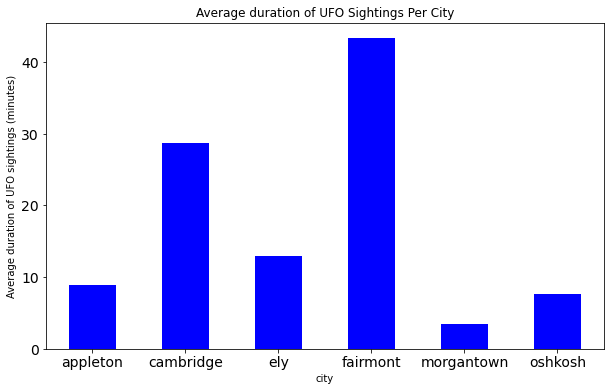

In [26]:
'''Created a bar chart to display the avergae amount of time a ufo sighting lasted for each city i have ever lived in'''  


import matplotlib.pyplot as plt

pivot_agg.plot(kind='bar', figsize=(10, 6), fontsize=14, legend=False, title="Average duration of UFO Sightings Per City", 
               color='blue', rot=0)

plt.ylabel("Average duration of UFO sightings (minutes)")
plt.show()